In [2]:
import astropy.units as u
import astropy.constants as c
import numpy as np
import matplotlib.pyplot as plt

# Stellar Formation

In the last lecture we covered 4 important concepts for stellar formation

- The equation of motion for collapsing cloud of gas:
    $-\frac{d^2r}{dt^2}=g(r)+\frac{1}{\rho (r)}\frac{dP}{dr}$.
- The freefall time:
    $t_{\rm FF} = \left[\frac{3 \pi}{32 G \rho }\right] ^{1/2}$.
- Hydrostatic equilibrium:
    $<P> = -\frac{1}{3}\frac{E_{\rm GP}}{V}$
- The Jeans Mass/Density:
    $M_{\rm J} = \frac{3 k T}{2 g \bar{m} } R$; 
    $\rho_{\rm J} = \frac{3}{4 \pi M^2}\left[\frac{3kT}{2G\bar{m}}\right]^3$
    
Using the Jeans Density, we found that for a 300 solar mass cloud, a density of $1\times 10^6$ particles/m$^3$ is enough to drive a collapse. Clouds with this density typically follow a hierarchical collapse. In this model, one large cloud begins to collapse, driving up the density at various parts of the cloud until the cloud seperates into smaller clouds, with densities high enough to cause graviational collapse. This process continues until a single cloud produces several stars.

## An adiabatic collapse
To relate our current problem to some of the concepts that were covered in thermodynamics last year, let's consider what happens if the cloud collapses adiabatically (that is, there is no exchange of heat with the surrounding environment). First, if we consider $M$ and $\bar{m}$ to be fixed, the temperature dependance on temperature is given by
$$
    T \propto \rho^{1/3}
$$
Now, imagine we have an ideal gas that is collapsing adiabatically. In such a scenario, the equation of state gives
$$
    T \propto \rho^{\gamma -1}
$$
where $\gamma$ is known as the adiabatic index. For a monatomic gas, $\gamma = 5/3$. The dependence of such a gas is shown in the below figure, and mainly highlights two behaviours. First, if a monatomic gas is initially located in the "contraction" phase of the diagram, it will slowly contract until it reachs the solid line - at which case, contraction ceases as the gas is in equilibrium. Alternatively, if a monatomic gas is in the "expansion" phase, it will expand until it reaches this equilibrium. This presents us with a problem, as it suggests that a monatomic gas will naturally cease expanding or contracting with relative ease, which is not conducive to star formation.

So what if instead $\gamma \leq 4/3$? In this case, such a gas will never cross that equilibrium line, which means a gas cloud that starts in the contraction region will continue to contract indefinitely, while a cloud in the expansion region will expand indefinitely. So then the question becomes - what sort of gas do we need such that $\gamma \leq 4/3$? Fortunately, this is trivial to do. If the cloud is not monatomic, or if all the hydrogen is either dissociated or ionized, then the adiabatic index is $\gamma \leq 4/3$.

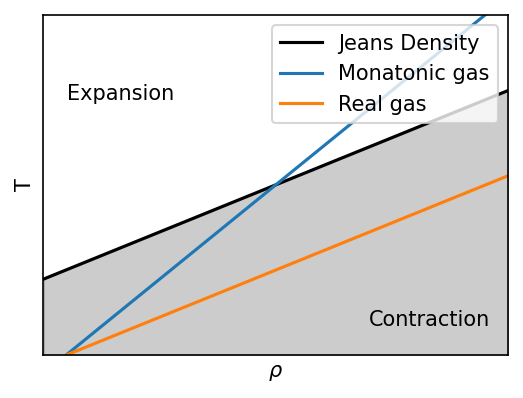

In [36]:
rho = np.logspace(-1,1,50)
T = rho**(1/3)
T_mona = rho**(5/3-1)
T_poly = 0.5*rho**(4/3-1)

fig,ax = plt.subplots(1,1,figsize=[4,3],dpi=150)
ax.set_ylim(0.4,1.6)
ax.axes.get_xaxis().set_ticks([])
ax.set_xlim(-1,1)
ax.axes.get_yaxis().set_ticks([])
ax.set_xlabel(r"$\rho$")
ax.set_ylabel("T")
    
ax.plot(np.log10(rho),1+np.log10(T),'k',label='Jeans Density')
ax.fill_between(np.log10(rho), 0, 1+np.log10(T), color='k', alpha=.2)
ax.plot(np.log10(rho),1+np.log10(T_mona),label='Monatonic gas')
ax.plot(np.log10(rho),1+np.log10(T_poly),label='Real gas')
ax.text(0.4,0.5,'Contraction')
ax.text(-0.9,1.3,'Expansion')
plt.legend(loc=1)
plt.savefig("Figures/Temp_density.png")
plt.show()

## A collapsing protostar
So let's assume we are at the final stage of this collapse - that is, we have a 1 solar mass dust cloud of molecular hydrogen at a temperature of 20 K, and an average density of:
$$
    \rho = \rho_{\rm J} = \frac{3}{4 \pi (1 {\rm M_{\odot}})^2}\left[ \frac{3k (20 {\rm K})}{2 G (2\times m_{\rm H})}\right] ^3
$$
The radius of such a cloud is $\sim 10^{15}$m. This cloud will collapse unopposed as long as the gravitational energy released is not converted into thermal motion of the particles. This will happen as long as the energy goes into dissassociation of hydrogen molecules and the ionization of H atoms.

## The radius at which pressure becomes important
So how small is the gas cloud when this happens? In order to estimate it, we need to know how much energy can go into dissociating and ionising H.

The energy to dissassociated a H molecules is $\epsilon _D=4.5$eV, while the energy needed to ionise a H atom is $\epsilon _I=13.6$eV. As such, the energy needed to dissociate all of the H molecules, and ionise of the H atoms, is approxmiately
$$
    \frac{M}{2m_H}\epsilon _D+\frac{M}{m_H}\epsilon _I
$$
Assuming that this energy comes from the graviational collapse of a cloud from $R_1$ to $R_2$, we can then equate these
$$
    \frac{GM^2}{r_2}-\frac{GM^2}{r_1}=\frac{M}{2m_H}\epsilon _D+\frac{M}{m_H}\epsilon _I
$$
If we plug in $10^{15}$m as the initial radius, and assume a 1 solar mass cloud, we find that $R_2\sim 10^{11}$m (or 0.6 AU), and that the free fall time is $\sim$ 100,000 years.

## The core temperature once freefall has been halted
So at this stage, the gravitational energy released by the collapse can no longer go into dissociating or ionising hydrogen. From this point onwards, any further contraction equates to an increase in temperature of the cloud, which (assuming an ideal gas) means the pressure increases, slowing the collapse. Our next step is to calculate the temperature at this stage. 

We are in hydrostatic equilibrium, so we can use the virial theorem:
$$
    <P>V = -\frac{1}{3} E_{\rm GP} = NkT
$$
to estimate the temperature. Now, $E_{\rm GP} \sim -\frac{GM^2}{r_2}$. As such, T is $\sim 60,000$ K.

This is below the temeperature required to drive fusion $(\sim 10^{7})$ K, so the cloud must collapse further to become a star.

Below is a code snippet showing where all of these numbers come from.

In [9]:
M = 1*u.solMass
m = 2*c.m_p
T = 20*u.K
ed = 4.5*u.eV
ei = 13.6*u.eV

rho = (3/(4*np.pi*M**2)) * ((3*c.k_B*T)/(2*c.G*m))**3
r1 = (3*M/(4*np.pi*rho))**(1/3)
r2 = c.G*M**2/((M/(2*c.m_p)*ed+M/(c.m_p)*ei+c.G*M**2/r1))
teff = ((3*np.pi)/(32*c.G*rho))**(1/2)

E_gp = -c.G*M**2/r2
T = -E_gp/(3*M/c.m_p*c.k_B)

print("The critical density is {:e}".format(rho.to(u.kg/u.m**3)))
print("The initial radius is {:e}/{:e}".format(r1.to(u.solRad),r1.to(u.m)))
print("The final radius is {:f}/{:e}".format(r2.to(u.solRad),r2.to(u.m)))
print("The freefall time is {:e}".format(teff.to(u.year)))
print("The internal temperature assuming hydrostatic equilibrium at R2 is {:f}".format(T.to(u.K)))

The critical density is 3.854896e-16 kg / m3
The initial radius is 1.540682e+06 solRad/1.071852e+15 m
The final radius is 125.635490 solRad/8.740461e+10 m
The freefall time is 1.072130e+05 yr
The internal temperature assuming hydrostatic equilibrium at R2 is 61315.537409 K


## Degeneracy Pressure

So, will all dust clouds collapse enough to create a high enough temperature to ignite fusion. The short answer is no, but to understand why we must start considering quantum mechanical effects.

We will start by assuming that there is a minimum total kinetic energy for a collection of electrons, and that this degeneracy occurs when the average distance between electrons becomes comparable to the De Broglie wavelength, $\lambda _{\rm DB} = h/p$ where $h$ is Planck's contant and $p$ is the momentum. The kinetic energy of a classical electron is $E_{\rm KE} = kT$, so the momentum is given by $p\sim \sqrt{2 m_{\rm e} kT}$ (please excuse the mixing of classical and quantum here, but we just want to get a rough handle on the picture). As such, the De Broglie wavelength is
$$
    \lambda_{\rm DB} = \frac{h}{\sqrt{2 m_{\rm e} kT}}
$$
So, a classical treatment of  the particles is appropriate when the distance between the electrons is much larger than this wavelength. Assume we have a cloud of electrons with a density of $\rho = \frac{\bar{m}}{\Delta x^3}$ (that is, each particle occupies a volume of $\Delta x^3$). For a classical treatment, we need $\Delta x >> \lambda$. This is satisfied when:
$$
    \rho << \frac{\bar{m}}{\lambda ^3} = \bar{m} \frac{(2 m_{\rm e} kT)^{3/2}}{h^3}
$$

Now, using our expression for the gravitational potential energy ($E_{GP}$) and kinetic energy $E_{KE}$, and assuming hydrostatic equilibrium is achieved and maintained, then we can show that the temperature of the star increases as
$$
    kT=\frac{GM\bar{m}}{3R} \simeq G\bar{m}M^{2/3}\rho^{1/3}.
$$
As such, the temperature at the core will rise with $\rho^{1/3}$ as long as the inequality on $\rho$ holds.

So, what happens when we reach the critical density? By comining the above two expressions, we arrive at an expression which tells us what the temperature of the core will be when this happens:
$$
    kT \sim \left(\frac{G}{h}\right)^2 \bar{m}^{8/3} m_e M^{4/3}
$$
Around this temperature, the electrons become generate, and exert degeneracy pressure, halting collapse. So, if we want fusion to occur, we need the temperature at which this occurs to be greater than $1\times 10^7$ K. The above approximateion predicts this should happen somewhere between 0.04 and 0.1 ${\rm M_{\odot}}$. A more detailed treatment shows this occurs when $M>0.06 {\rm M_{\odot}}$. So, for a dust cloud with an initial mass higher than this, the core temperature will get high enough to start fusion. 

Smaller than this, and electron degeneracy presssure will halt collapse before the temperature has gotten high enough to ignite. Such stars are called brown dwarfs, and produce very low luminosities, making them very hard to observer.